## important libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


## data exploration and feature engineering

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
print(train.shape)
test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')
print(test.shape)
submission = pd.read_csv('/kaggle/input/playground-series-s4e7/sample_submission.csv')
train.head()



(11504798, 12)
(7669866, 11)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
print(len(train))
print(train.info())
print('\nconvert gender, vehicle age, vehicle damage into numerical data')
## exploring geneder, vehical age, vehical damage
print('Gender', train['Gender'].unique())
print('Vehicle_Age', train['Vehicle_Age'].unique())
print('Vehicle_Damage', train['Vehicle_Damage'].unique())

print('Duplicate values', train.duplicated().sum())
print('Null values', train.isnull().sum().sum())
print(train.isin([np.inf, -np.inf]).sum())

11504798
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB
None

convert gender, vehicle age, vehicle damage into numerical data
Gender ['Male' 'Female']
Vehicle_Age ['1-2 Year' '> 2 Years' '< 1 Year']
Vehicle_Damage ['Yes' 'No']
Duplicate values 0
Null values 0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


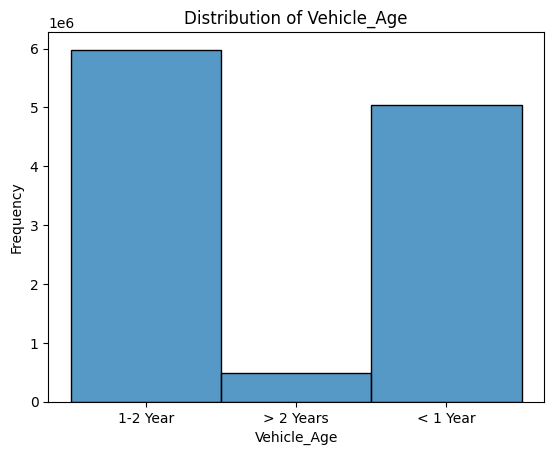

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


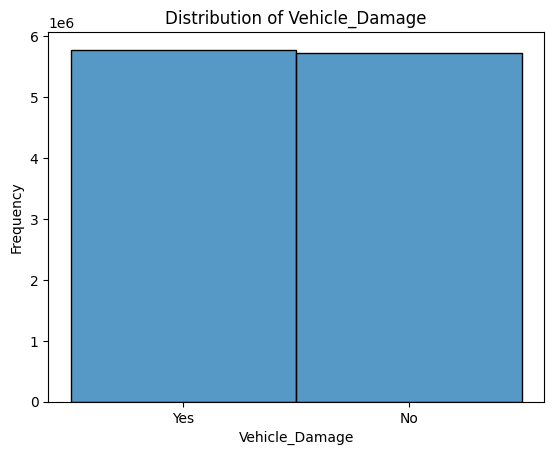

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


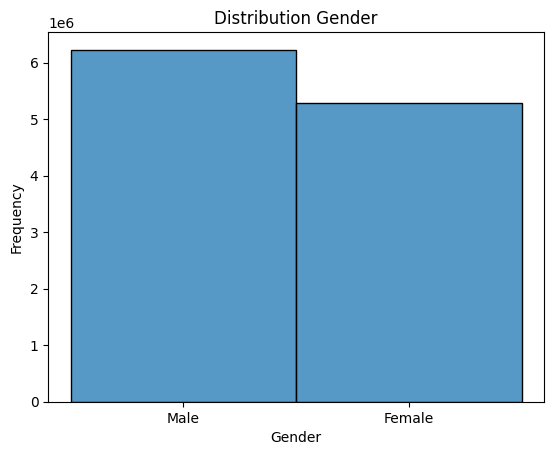

In [13]:
## distribution of vehicle age and damage 
sns.histplot(train['Vehicle_Age'], kde = False, bins = 5)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

sns.histplot(train['Vehicle_Damage'], kde = False, bins = 5)
plt.title('Distribution of Vehicle_Damage')
plt.xlabel('Vehicle_Damage')
plt.ylabel('Frequency')
plt.show()

sns.histplot(train['Gender'], kde = False, bins = 5)
plt.title('Distribution Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [15]:
df = train.replace([np.inf, -np.inf], np.nan)
df.isnull().sum().sum()

0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


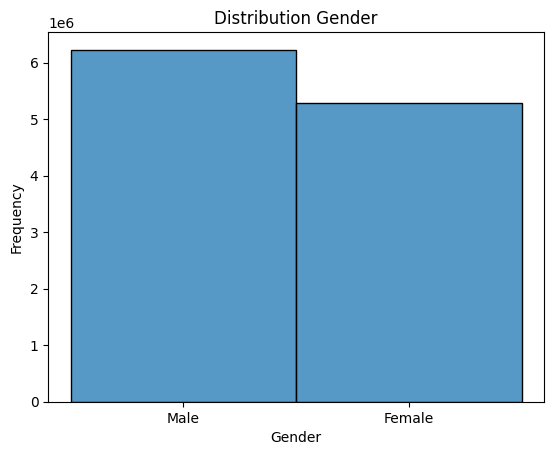

In [16]:
sns.histplot(df['Gender'], kde = False, bins = 5)
plt.title('Distribution Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

- https://www.kaggle.com/code/annantkumarsingh/health-insurance-cross-sell-prediction/notebook 
- https://www.kaggle.com/code/syednazmussakib/neural-network-based-solution
- https://towardsdatascience.com/lets-do-neural-networks-d849d80fd012

In [18]:
## vehicle_Age to numercal data (<1 => 1; 1-2 => 1.5; >2 => 2) 
train['Vehicle_Age'] = train['Vehicle_Age'].replace({'1-2 Year':1.5, '> 2 Years':2, '< 1 Year': 1})
## Gender (male => 1 and female => 0 (vice versa both fine))
train['Gender'] = np.where(train['Gender'] == 'Male', 1, 0)
## vehicle_damage () yes => 1; no => 0)
train['Vehicle_Damage'] = np.where(train['Vehicle_Damage'] == 'Yes', 1, 0)
print (train.dtypes)

/tmp/ipykernel_33/3655560540.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Vehicle_Age'] = train['Vehicle_Age'].replace({'1-2 Year':1.5, '> 2 Years':2, '< 1 Year': 1})


id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age             float64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


## exploratory data analysis to check some coorelations 


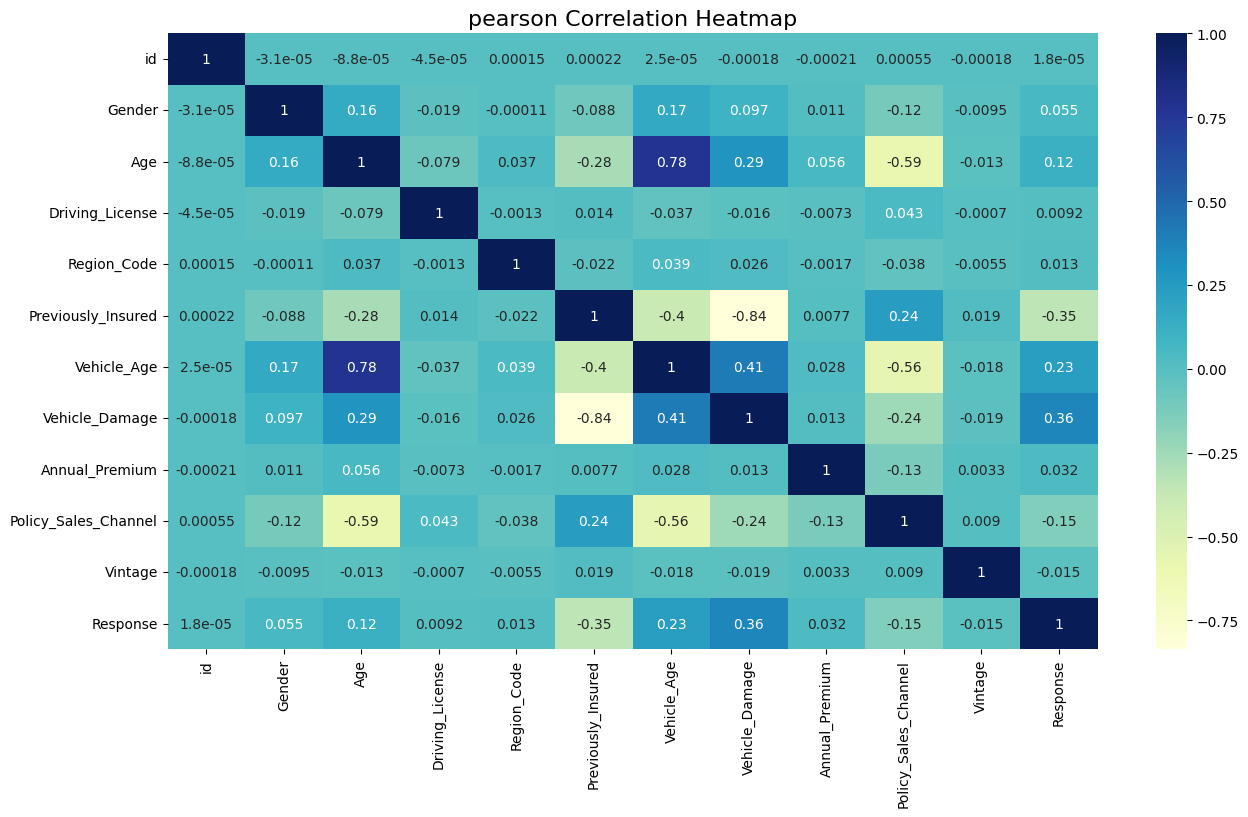

In [26]:
corr = train.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            cmap="YlGnBu", annot=True, fmt='.2g')
plt.title("pearson Correlation Heatmap", fontsize=16)
plt.show();

## splitting data and training 

In [30]:
# train.loc[ : , train.columns != 'id']
X_train = train.drop(['id', 'Response'], axis=1)
Y_train = df['Response']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [31]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [36]:
def model_prediction(model, x_train, x_test, y_train, y_test):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Greens")
    plt.show()
    
    return model


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy_Score of LogisticRegression() model on Training Data is: 87.34028711998151
Accuracy_Score of LogisticRegression() model on Testing Data is: 87.33890781818603
Precision Score of LogisticRegression() model is: 0.29641567818463127
Recall Score of LogisticRegression() model is: 0.021670382083052518
AUC Score of LogisticRegression() model is: 0.8107754426688343

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


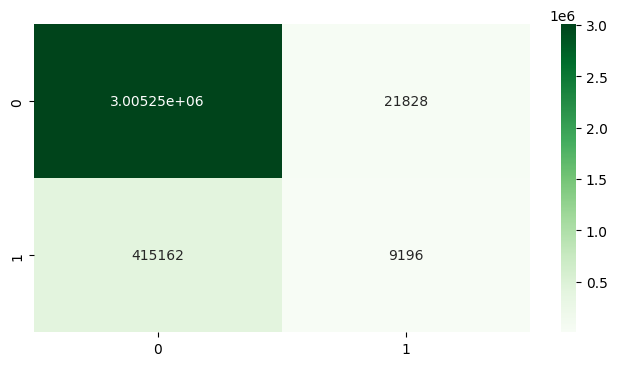

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model = model_prediction(clf, x_train, x_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 990701, number of negative: 7062657
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.435593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 8053358, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.123017 -> initscore=-1.964164
[LightGBM] [Info] Start training from score -1.964164
Accuracy_Score of LGBMClassifier() model on Training Data is: 87.9589979732678
Accuracy_Score of LGBMClassifier() model on Testing Data is: 87.95751918040007
Precision Score of LGBMClassifier() model is: 0.587503261676803
Recall Score of LGBMClassifier() model is: 0.06897478072759321
AUC Score of LGBMClassifier() model is: 0.8753850482899175

------------------------------------------------------------------------
Confusion Matrix of 

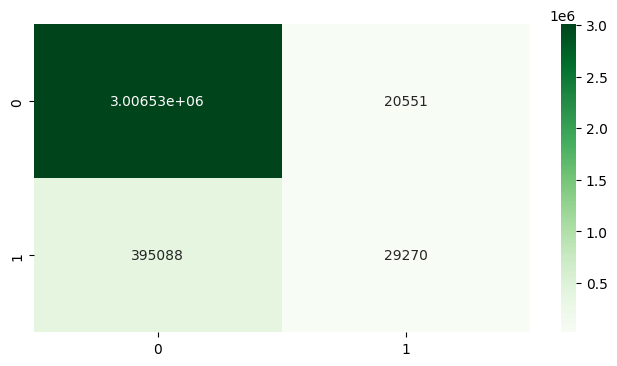

In [45]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
model = model_prediction(clf, x_train, x_test, y_train, y_test)

In [39]:
## vehicle_Age to numercal data (<1 => 1; 1-2 => 1.5; >2 => 2) 
test['Vehicle_Age'] = test['Vehicle_Age'].replace({'1-2 Year':1.5, '> 2 Years':2, '< 1 Year': 1})
## Gender (male => 1 and female => 0 (vice versa both fine))
test['Gender'] = np.where(test['Gender'] == 'Male', 1, 0)
## vehicle_damage () yes => 1; no => 0)
test['Vehicle_Damage'] = np.where(test['Vehicle_Damage'] == 'Yes', 1, 0)
test

/tmp/ipykernel_33/3782923365.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Vehicle_Age'] = test['Vehicle_Age'].replace({'1-2 Year':1.5, '> 2 Years':2, '< 1 Year': 1})


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,0,20,1,47.0,0,1.0,0,2630.0,160.0,228
1,11504799,1,47,1,28.0,0,1.5,1,37483.0,124.0,123
2,11504800,1,47,1,43.0,0,1.5,1,2630.0,26.0,271
3,11504801,0,22,1,47.0,1,1.0,0,24502.0,152.0,115
4,11504802,1,51,1,19.0,0,1.5,0,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,1,57,1,28.0,0,1.5,1,51661.0,124.0,109
7669862,19174660,1,28,1,50.0,1,1.0,0,25651.0,152.0,184
7669863,19174661,1,47,1,33.0,1,1.5,0,2630.0,138.0,63
7669864,19174662,1,30,1,28.0,0,1.0,1,38866.0,124.0,119


In [47]:
submission['Response'] = model.predict(test.drop(['id'], axis=1))
submission.to_csv('Submission.csv', index = False)
